# **SVM**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

df = pd.read_csv('Data4.csv')
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
print(df['car'].unique())
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['persons'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())

['unacc' 'acc' 'vgood' 'good']
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]


In [ ]:
df['buying']=df['buying'].replace({'vhigh':0, 'high':1, 'med':2, 'low':3})
df['maint']=df['maint'].replace({'vhigh':0, 'high':1, 'med':2, 'low':3})
df['doors']=df['doors'].replace({'two':0, 'three':1, 'four':2, '5more':3})
df['persons']=df['persons'].replace({'two':0, 'four':1, 'more':2})
df['buying']=df['buying'].replace({'vhigh':0, 'high':1, 'med':2, 'low':3})
df['lug_boot']=df['lug_boot'].replace({'small':0, 'med':1, 'big':2})
df['safety']=df['safety'].replace({'low':0, 'med':1, 'high':2})

df

,buying,maint,doors,persons,lug_boot,safety,car
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,good
1724,3,3,3,2,1,2,vgood
1725,3,3,3,2,2,0,unacc
1726,3,3,3,2,2,1,good


<Axes: >

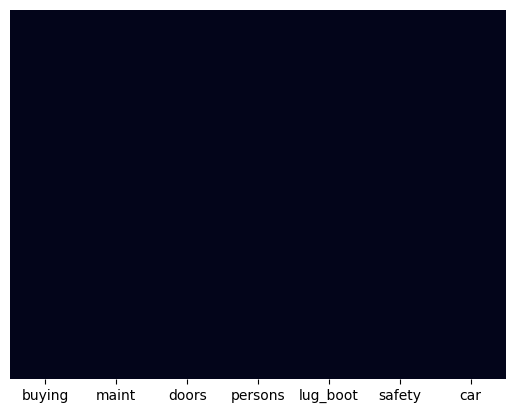

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
X = df.drop(columns='car')
X

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [ ]:
y = df['car']
y

,car
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1345,1,1,1,2,1,1
300,0,1,2,0,1,0
989,3,1,2,1,2,2
1588,0,0,3,2,1,1
1196,1,0,0,2,2,2
...,...,...,...,...,...,...
368,2,0,2,0,2,2
48,1,1,0,0,1,0
772,1,1,1,1,2,1
1231,2,0,0,2,2,1


In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
1066,1,2,3,1,1,1
1172,0,2,0,2,0,2
213,1,3,1,0,2,0
23,0,2,0,0,1,2
826,2,3,1,1,2,1
...,...,...,...,...,...,...
438,0,0,3,0,2,0
1070,1,2,3,1,2,2
164,0,2,1,0,0,2
1127,3,1,3,1,0,2


In [ ]:
y_train

,car
1345,acc
300,unacc
989,vgood
1588,unacc
1196,unacc
...,...
368,unacc
48,unacc
772,acc
1231,acc


In [ ]:
y_test

,car
1066,acc
1172,unacc
213,unacc
23,unacc
826,good
...,...
438,unacc
1070,acc
164,unacc
1127,acc


In [ ]:
from sklearn.svm import SVC
model = SVC(C=7,kernel='poly')
model.fit(X_train,y_train)

SVC(C=7, kernel='poly')

In [ ]:
model.score(X_train,y_train)

0.9867659222497932

In [ ]:
model.score(X_test,y_test)

0.953757225433526

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

pred = model.predict(X_test)
matrix = classification_report(y_test, pred)
print(matrix)

              precision    recall  f1-score   support

         acc       0.90      0.91      0.90       109
        good       0.94      0.68      0.79        22
       unacc       0.98      0.98      0.98       370
       vgood       0.75      1.00      0.86        18

    accuracy                           0.95       519
   macro avg       0.89      0.89      0.88       519
weighted avg       0.96      0.95      0.95       519



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(33.22222222222222, 0.5, 'Actual value')

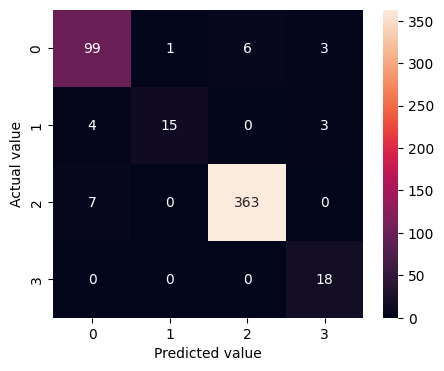

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

# **5 Different ML Classifiers**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target variable
X = df.drop('car', axis=1)
y = df['car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and evaluate RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RandomForestClassifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred))

# Define and evaluate LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLogisticRegression:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")
print(classification_report(y_test, lr_pred))

# Define and evaluate SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("\nSVC:")
print(f"Accuracy: {accuracy_score(y_test, svc_pred):.2f}")
print(classification_report(y_test, svc_pred))

# Define and evaluate KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("\nKNeighborsClassifier:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(classification_report(y_test, knn_pred))

# Define and evaluate GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("\nGaussianNB:")
print(f"Accuracy: {accuracy_score(y_test, gnb_pred):.2f}")
print(classification_report(y_test, gnb_pred))


RandomForestClassifier:
Accuracy: 0.98
              precision    recall  f1-score   support

         acc       0.93      0.97      0.95       119
        good       0.95      1.00      0.97        18
       unacc       0.99      0.98      0.99       360
       vgood       1.00      0.91      0.95        22

    accuracy                           0.98       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.98      0.98      0.98       519


LogisticRegression:
Accuracy: 0.82
              precision    recall  f1-score   support

         acc       0.64      0.60      0.62       119
        good       0.75      0.33      0.46        18
       unacc       0.88      0.93      0.90       360
       vgood       0.76      0.59      0.67        22

    accuracy                           0.82       519
   macro avg       0.76      0.61      0.66       519
weighted avg       0.81      0.82      0.81       519


SVC:
Accuracy: 0.97
              precision    recall 

# **Confusion Matrix for 5 Different ML Classifiers**

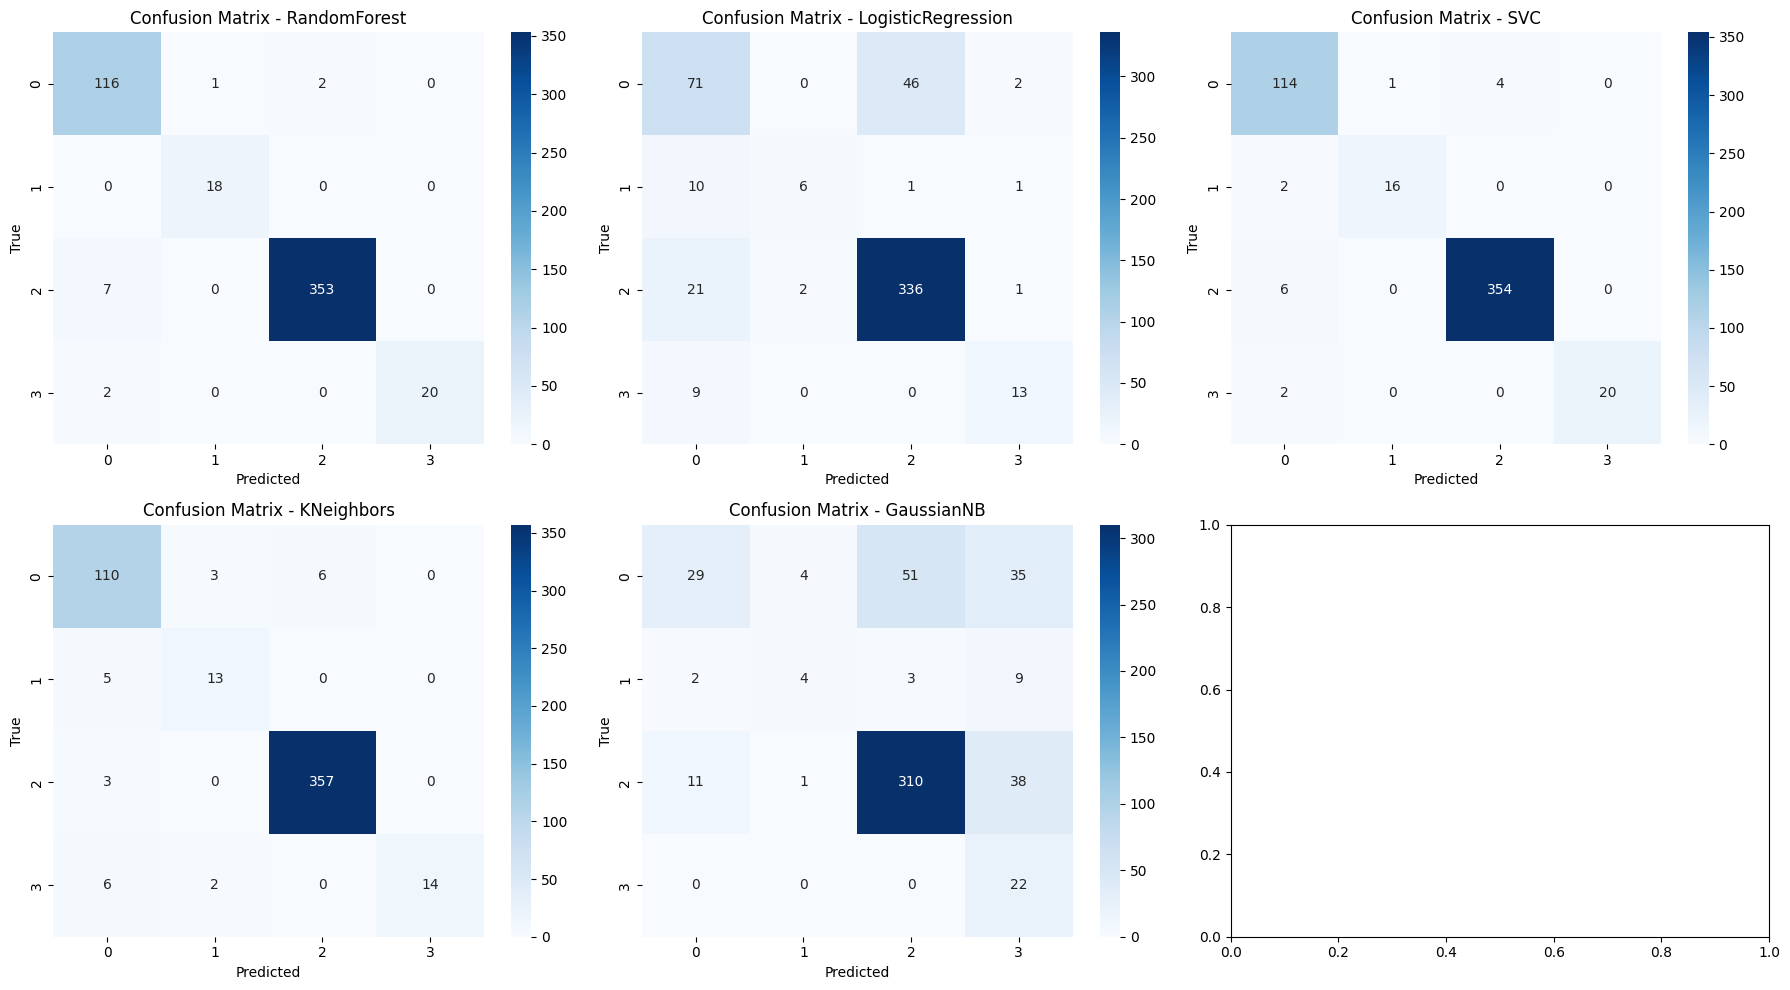

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# List of classifiers and their predictions
classifiers = {
    'RandomForest': rf,
    'LogisticRegression': lr,
    'SVC': svc,
    'KNeighbors': knn,
    'GaussianNB': gnb
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, clf) in enumerate(classifiers.items()):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()


# **Training and Testing Accuracy Graph of 5 Classifiers**

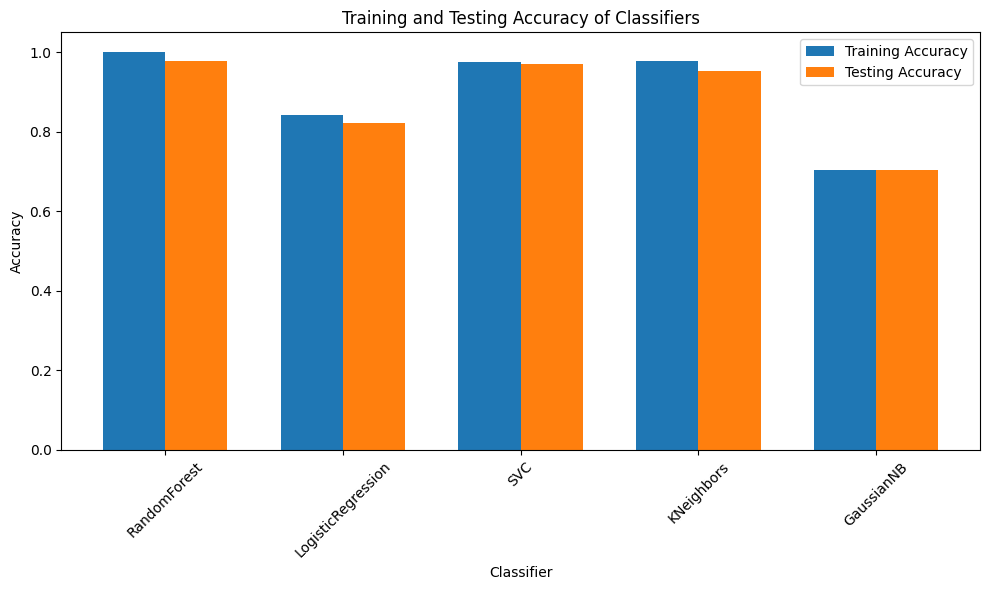

In [ ]:
import matplotlib.pyplot as plt

# Store accuracies
train_accuracies = []
test_accuracies = []
names = list(classifiers.keys())

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracies
bar_width = 0.35
index = range(len(names))

plt.figure(figsize=(10, 6))
plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Testing Accuracy')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Classifiers')
plt.xticks([i + bar_width / 2 for i in index], names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# **Graph Showing Accuracy of 5 Classifiers**

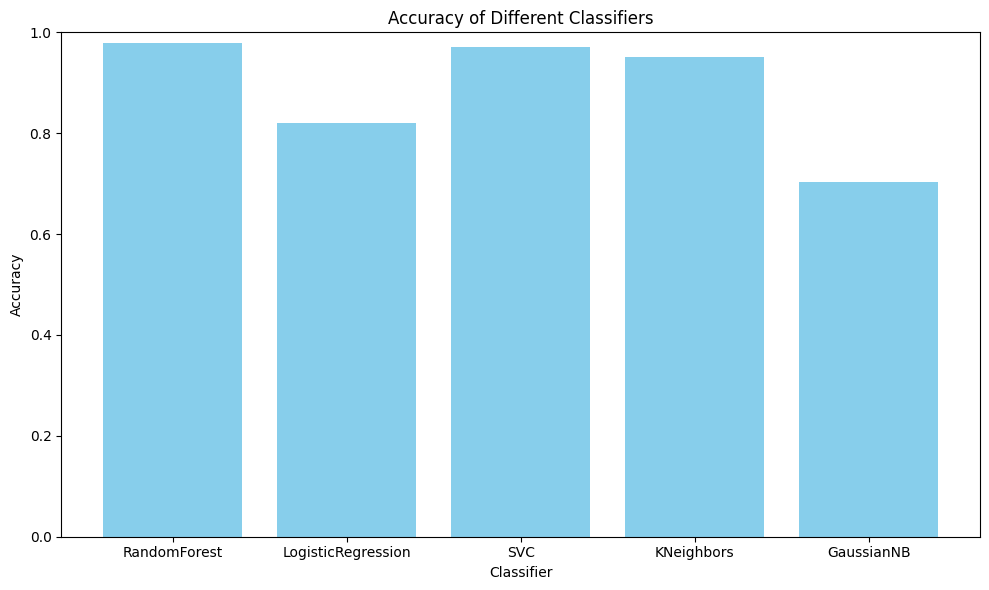

In [ ]:
# Store accuracies for a simpler accuracy plot
accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


# **Different Ratios of Training and Testing Samples**

In [ ]:
# Print ratios
print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')
print(f'Training ratio: {len(X_train) / len(df):.2f}')
print(f'Testing ratio: {len(X_test) / len(df):.2f}')


Training samples: 1209
Testing samples: 519
Training ratio: 0.70
Testing ratio: 0.30


# **K-Fold Cross Validation**

RandomForest Cross-Validation Accuracy: 0.91
LogisticRegression Cross-Validation Accuracy: 0.74
SVC Cross-Validation Accuracy: 0.90
KNeighbors Cross-Validation Accuracy: 0.86
GaussianNB Cross-Validation Accuracy: 0.67


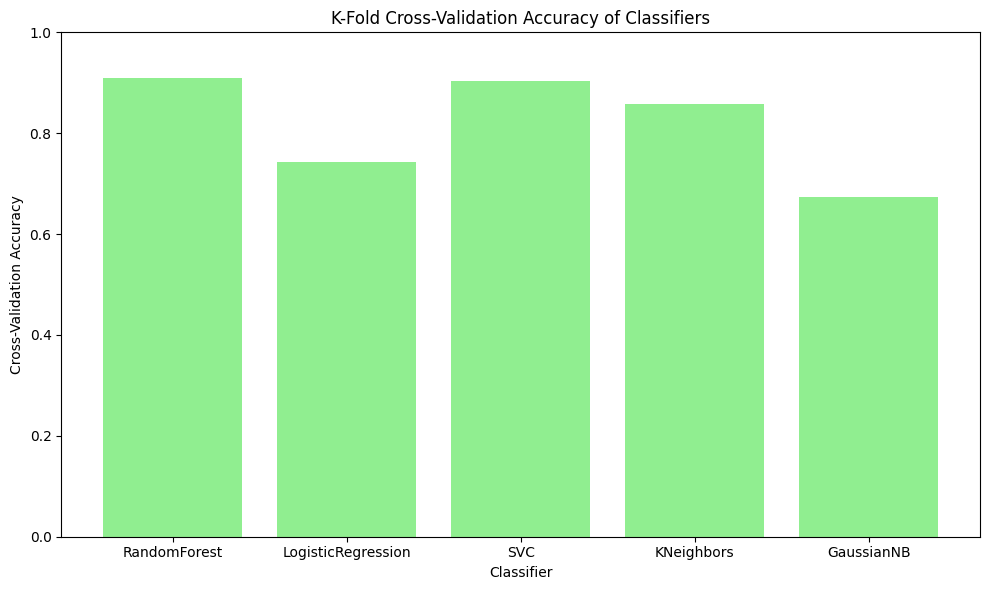

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform K-Fold Cross Validation
kf_results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    kf_results[name] = np.mean(scores)
    print(f'{name} Cross-Validation Accuracy: {kf_results[name]:.2f}')

# Plot K-Fold cross-validation results
plt.figure(figsize=(10, 6))
plt.bar(kf_results.keys(), kf_results.values(), color='lightgreen')
plt.xlabel('Classifier')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-Fold Cross-Validation Accuracy of Classifiers')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


# **Feature Importance**

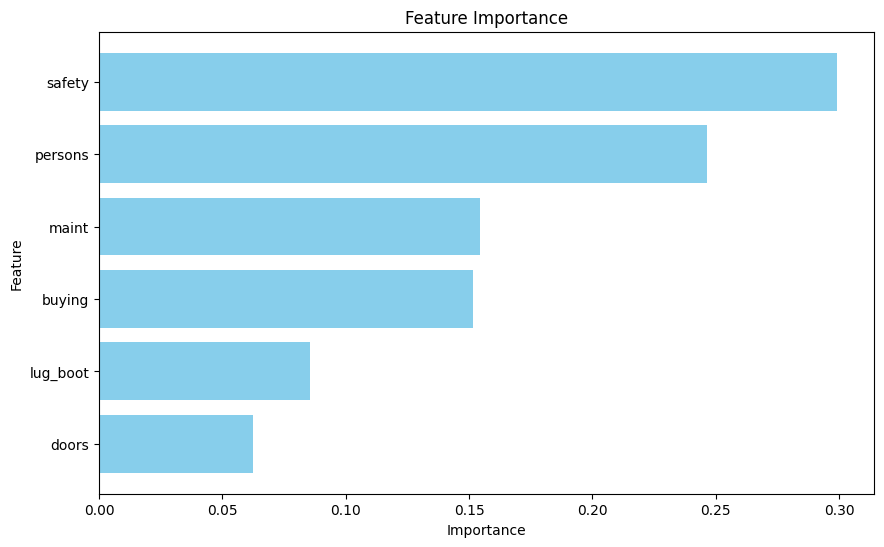

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target variable
X = df.drop('car', axis=1)
y = df['car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


# **Code for Using a Validation Set**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target variable
X = df.drop('car', axis=1)
y = df['car']

# Split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate on the validation set
val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_report = classification_report(y_val, val_pred)

print("Validation Set Performance:")
print(f"Accuracy: {val_accuracy:.2f}")
print("Classification Report:")
print(val_report)

# Evaluate on the test set
test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_report = classification_report(y_test, test_pred)

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(test_report)

Validation Set Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

         acc       0.91      0.96      0.94        77
        good       0.73      0.89      0.80         9
       unacc       0.99      0.98      0.99       264
       vgood       1.00      0.62      0.76        13

    accuracy                           0.96       363
   macro avg       0.91      0.86      0.87       363
weighted avg       0.97      0.96      0.96       363


Test Set Performance:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         acc       0.92      0.96      0.94       119
        good       0.95      1.00      0.97        18
       unacc       0.99      0.98      0.98       360
       vgood       1.00      0.82      0.90        22

    accuracy                           0.97       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.97      0.97      0.97       519

